In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'
ordem = 3
pasta = f'{models.path_dados_tratados}/ordens_{ordem}/{dados_normalizados}'
df = pd.read_csv(pasta, header=0)
# df = pd.DataFrame(df)[models.colunas]
# df['defeito'] = df['defeito'].replace(models.sensores)

# df['rotacao_hz'] = 10*(df['rotacao_hz']//10)
# print(df['rotacao_hz'])

# df['sensor'] = df['sensor'].replace(models.sensores)

df = normalizar_sinal.NormalizarSinal(df,1).Get()
df = pd.DataFrame(df)[models.colunas]
# print(df)
# print(df)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
# print(X_train)

In [3]:
 
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9433285819187076


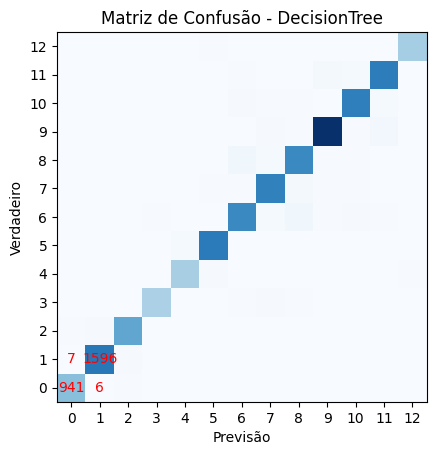

A precisão do classificador é: 94.3 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.98      0.98      0.98       963
               ball_fault_baixo       0.98      0.98      0.98      1622
               ball_fault_medio       0.97      0.97      0.97      1214
 desalinhamento_horizontal_alto       0.92      0.91      0.91       807
desalinhamento_horizontal_baixo       0.93      0.94      0.93       807
desalinhamento_horizontal_médio       0.95      0.96      0.95      1645
   desalinhamento_vertical_alto       0.90      0.89      0.90      1623
  desalinhamento_vertical_baixo       0.92      0.93      0.92      1646
  desalinhamento_vertical_médio       0.89      0.90      0.90      1615
          desbalanceamento_alto       0.95      0.94      0.94      2370
         desbalanceamento_baixo       0.93      0.93      0.93      1653
         desbalanceamento_medio       0.93      0.94    

In [4]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# for i in range(1,15):
#     # Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 98.58 %


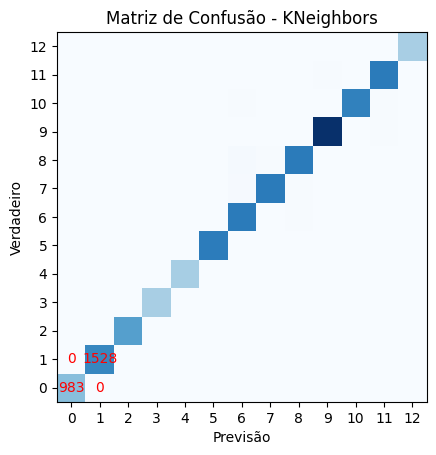

A precisão do classificador é: 98.58 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.99      1.00      1.00       986
               ball_fault_baixo       1.00      1.00      1.00      1532
               ball_fault_medio       1.00      0.99      0.99      1300
 desalinhamento_horizontal_alto       0.98      0.99      0.98       794
desalinhamento_horizontal_baixo       0.98      0.99      0.99       801
desalinhamento_horizontal_médio       0.99      0.99      0.99      1638
   desalinhamento_vertical_alto       0.96      0.98      0.97      1661
  desalinhamento_vertical_baixo       0.98      0.97      0.97      1683
  desalinhamento_vertical_médio       0.98      0.97      0.97      1677
          desbalanceamento_alto       0.99      0.99      0.99      2319
         desbalanceamento_baixo       0.98      0.97      0.97      1611
         desbalanceamento_medio       0.98      0.99   

In [6]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

Redes Neurais

In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [8]:
from sklearn.preprocessing import LabelEncoder
# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

724/724 [==============================] - 1s 1ms/step


In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 991    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1539    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1267    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 840    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [ 825    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1650    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1693    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1690    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1667    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [2280    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [1661    

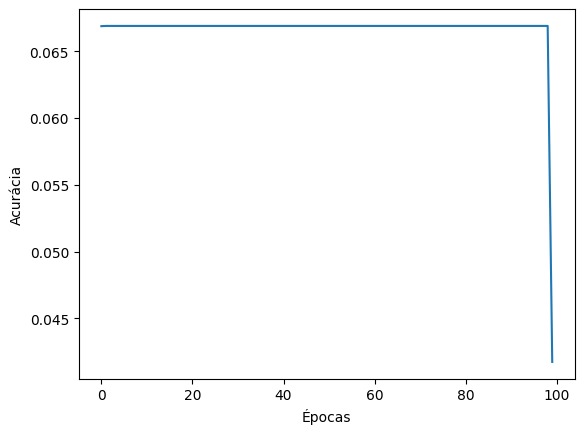

In [13]:
plt.plot(history.history['accuracy'])
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.show()